In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 75 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 10
symbols = ['^W5000', '^IXIC']
tickers = {'^W5000': 'wilshire',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv',
         '^W5000': '../data/wilshire1990.csv'}

ITERS: 75





WILSHIRE


--------------------------------------------------
Beginning 4-param model...
--------------------------------------------------
Using start date: 2012-04-08
Successfully loaded params from ../data/pct_params/wilshire_3yr_4param.json
{   'params': {   'amounts': [   0.99,
                                 0.99,
                                 -0.5127613855440403,
                                 0.6345328387087308],
                  'qs': [0.01, -0.6871754954099388, 0.99, 0.9265185071396523]},
    'sd': 0.5382108032261755,
    'window': 20}
 1: Final value: $46159.44 (window = 20; sd = 0.538)
30: Final value: $46181.78 (window = 1000; sd = 0.402)
New best model!
{   'amounts': [   -0.6739788480038446,
                   0.26812850535606936,
                   -0.26166602858903276,
                   -0.4134671922355545],
    'qs': [-0.5943091907946385, 0.5940982511119831, 0.5902049853693693, -0.99]}
75: Final value: $28626.66 (window = 299; sd = 0.388))
% in now: 0.10205

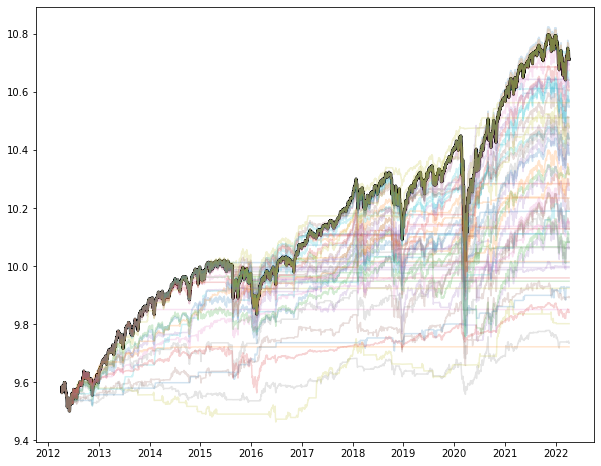

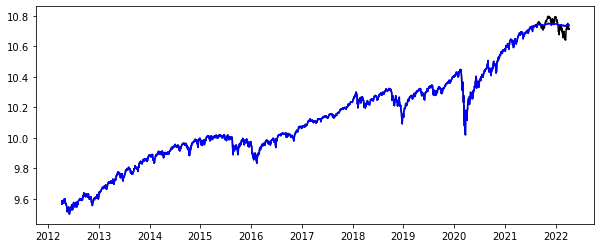

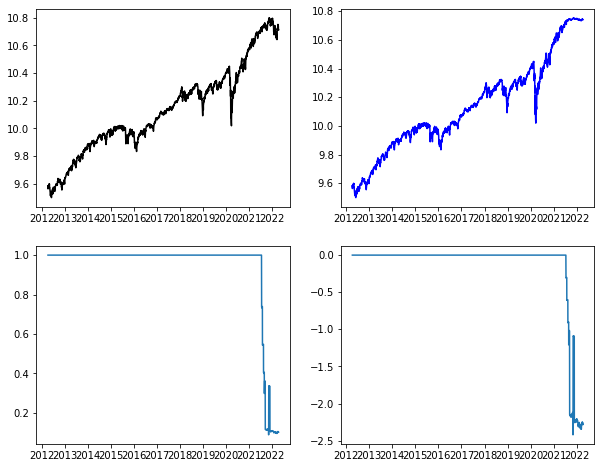



--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2012-04-08
Successfully loaded params from ../data/pct_params/wilshire_3yr_3param.json
{   'params': {   'amounts': [-0.99, 0.99, 0.99],
                  'qs': [-0.99, 0.5140615876326061, -0.5127820992386558]},
    'sd': 0.5067147874306119,
    'window': 20}
 1: Final value: $48474.41 (window = 20; sd = 0.507)
75: Final value: $28879.91 (window = 1000; sd = 0.241)
% in now: 1.0
Actions taken: 311
Wrote params to ../data/pct_params/wilshire_3yr_3param.json


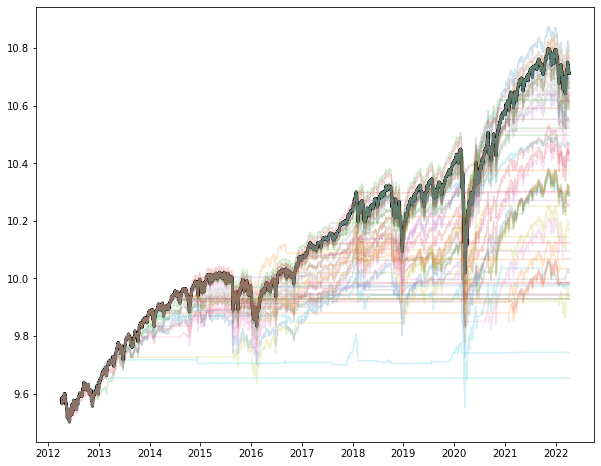

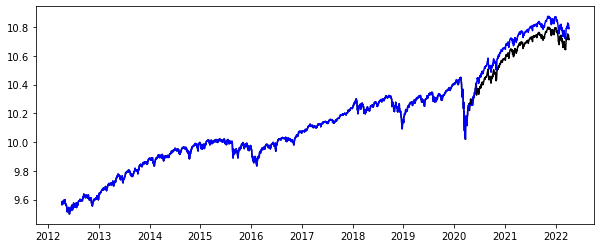

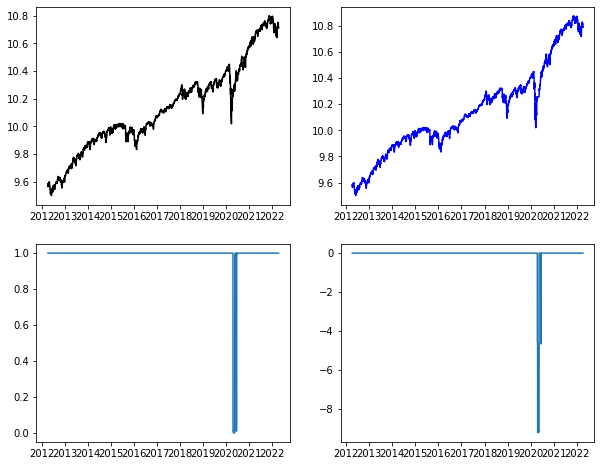



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2012-04-08
Successfully loaded params from ../data/pct_params/wilshire_3yr_2param.json
{   'params': {'amounts': [-0.99, 0.99], 'qs': [0.99, -0.48274776568030375]},
    'sd': 0.33791279992036677,
    'window': 20}
 1: Final value: $47664.85 (window = 20; sd = 0.338)
75: Final value: $39100.24 (window = 654; sd = 0.161)
% in now: 1.0
Actions taken: 157
Wrote params to ../data/pct_params/wilshire_3yr_2param.json


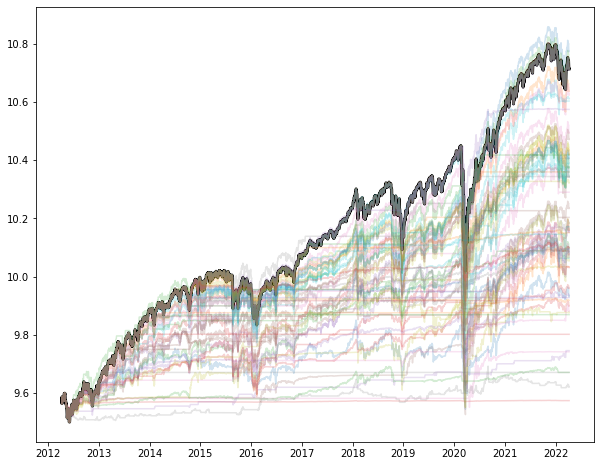

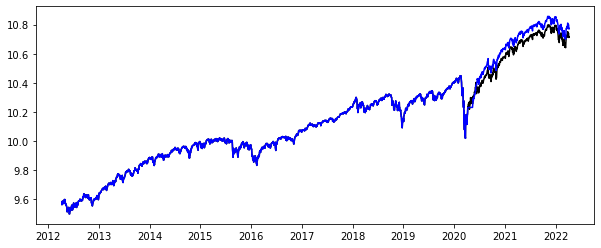

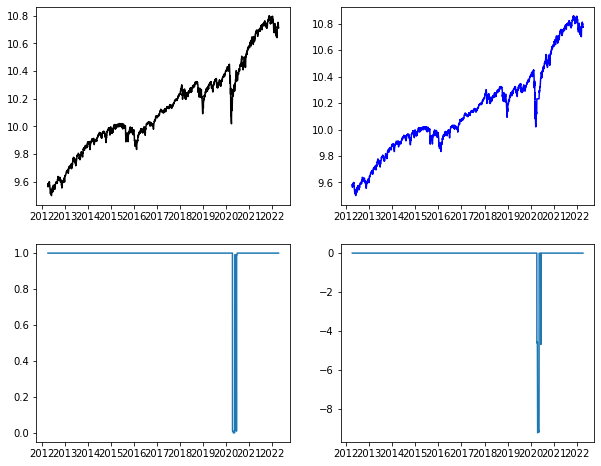




NASDAQ


--------------------------------------------------
Beginning 4-param model...
--------------------------------------------------
Using start date: 2012-04-08
Successfully loaded params from ../data/pct_params/nasdaq_3yr_4param.json
{   'params': {   'amounts': [   -0.48367720163675276,
                                 0.99,
                                 -0.8880650990892309,
                                 0.7565527065469599],
                  'qs': [   0.99,
                            -0.778707766761169,
                            -0.8170615490923137,
                            -0.8873953834552558]},
    'sd': 0.6384900043685885,
    'window': 441}
 1: Final value: $14403.04 (window = 441; sd = 0.638)
17: Final value: $14564.73 (window = 736; sd = 0.544)
New best model!
{   'amounts': [   0.6697825486827833,
                   0.3655818217129239,
                   -0.047085493208021134,
                   0.99],
    'qs': [   0.899148226752355,
              -0.145

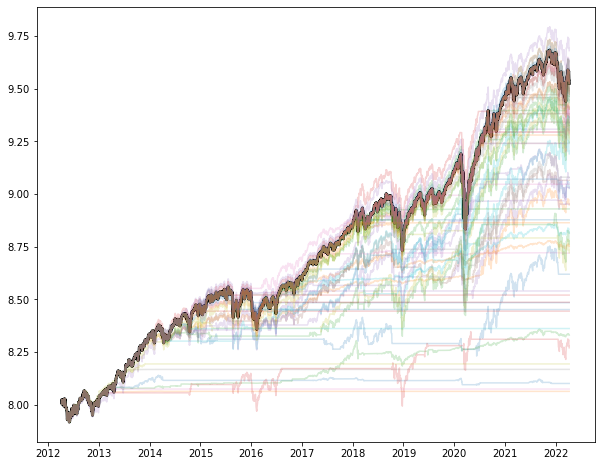

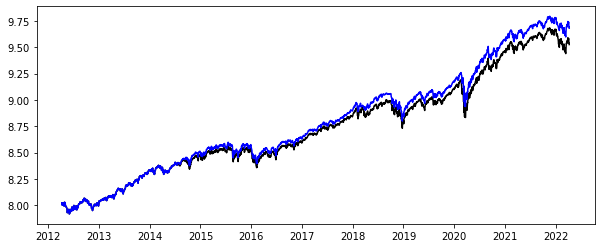

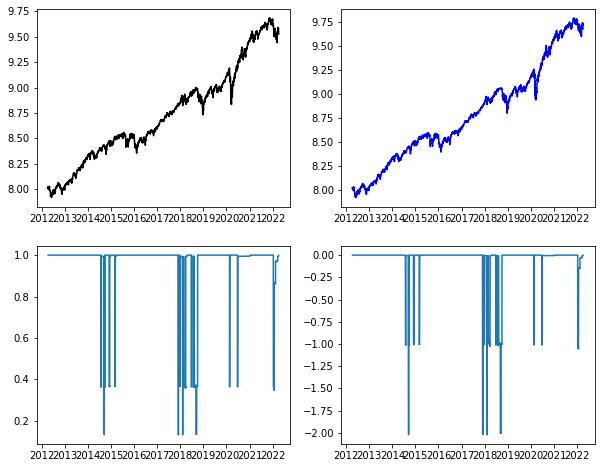



--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2012-04-08
Successfully loaded params from ../data/pct_params/nasdaq_3yr_3param.json
{   'params': {   'amounts': [   -0.4205179107815049,
                                 0.3771068862067405,
                                 0.819286429121291],
                  'qs': [   0.989344896029734,
                            -0.501963293135753,
                            0.385181841267351]},
    'sd': 0.35789784161166416,
    'window': 336}
 1: Final value: $13711.00 (window = 336; sd = 0.358)
57: Final value: $13761.17 (window = 1000; sd = 0.204)
New best model!
{   'amounts': [-0.1578968126771697, -0.99, 0.99],
    'qs': [-0.5205124258049596, 0.6931800046252751, 0.2534571658367874]}
75: Final value: $ 7364.62 (window = 976; sd = 0.258))
% in now: 0.9999130347386104
Actions taken: 44
Wrote params to ../data/pct_params/nasdaq_3yr_3param.json


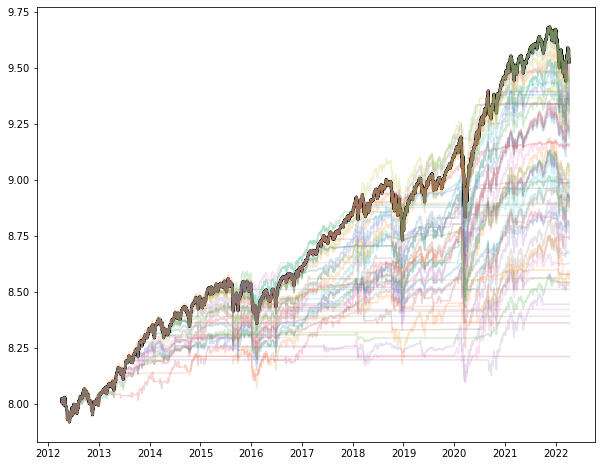

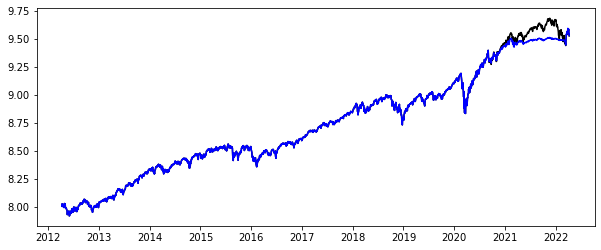

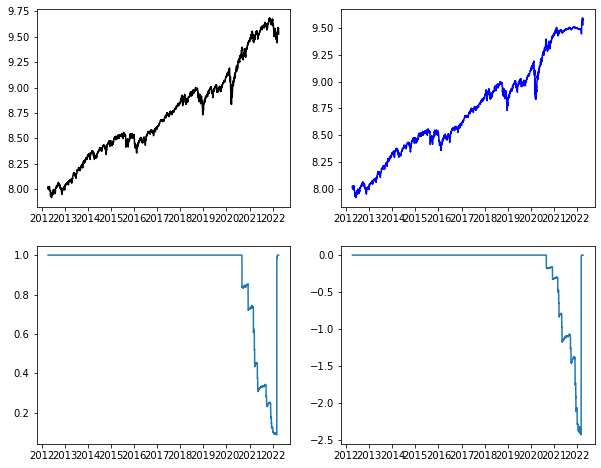



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2012-04-08
Successfully loaded params from ../data/pct_params/nasdaq_3yr_2param.json
{   'params': {   'amounts': [0.33857439128223565, -0.99],
                  'qs': [-0.13299204744229387, -0.99]},
    'sd': 0.4966311631607427,
    'window': 628}
 1: Final value: $13711.00 (window = 628; sd = 0.497)
75: Final value: $10846.93 (window = 20; sd = 0.236)))
% in now: 1.0
Actions taken: 32
Wrote params to ../data/pct_params/nasdaq_3yr_2param.json


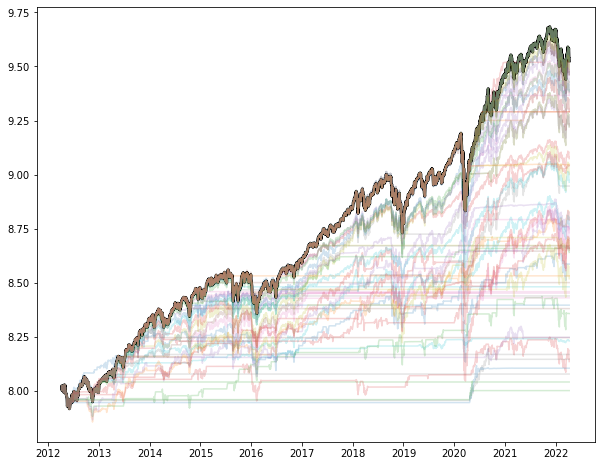

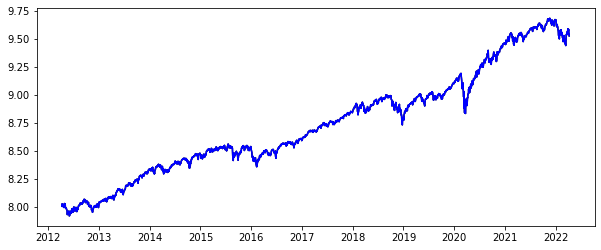

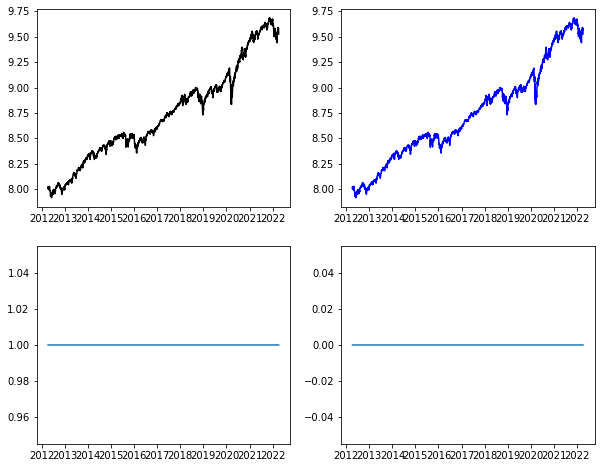

In [6]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = {'pct_in': [], 'multiplier': []}
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [4, 3, 2]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_3yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker]['pct_in'].append(plot_results(best_data))
        mod_returns = (
            best_data.Total.tolist()[-1] / best_data.Total.tolist()[1])
        market_returns = (
            best_data.Value.tolist()[-1] / best_data.Value.tolist()[1])
        multiplier = mod_returns / market_returns
        percent_in[ticker]['multiplier'].append(multiplier)
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()

In [7]:
for idx, data in percent_in.items():
    for i, pct in enumerate(data['multiplier']):
        if pct <= 1:
            data['pct_in'][i] = 1
            data['multiplier'][i] = 0
for idx, data in percent_in.items():
    print(idx)
    for k, v in data.items():
        print(f'  {k:10s}:', end=' ')
        for amt in v:
            print(f'{amt:.4f}', end=' ')
        print()
    print()

wilshire
  pct_in    : 0.1021 1.0000 1.0000 
  multiplier: 1.0279 1.0789 1.0609 

nasdaq
  pct_in    : 0.9987 0.9999 1.0000 
  multiplier: 1.1678 1.0037 0.0000 



In [8]:
!say 10 year done